#### Link to github repo

https://github.com/tryllekunstneren/Assignment1_Group11/blob/main/Assignment1.ipynb

## Assignment 1: Computational Social Science 

##### Christian Warburg s225083 and Sofus Carstens s224959

## Part 1: Web-scraping
Week 1, ex 3.

##### Answer

Answers can be seen below the exercise questions

> **Exercise: Web-scraping the list of participants to the International Conference in Computational Social Science**   

> 1. Inspect the HTML of the page and use web-scraping to get the names of all researchers that contributed to the conference in 2023. The goal is the following: (i) get as many names as possible including: keynote speakers, chairs, authors of parallel talks and authors of posters; (ii) ensure that the collected names are complete and accuarate as reported in the website (e.g. both first name and family name); (iii) ensure that no name is repeated multiple times with slightly different spelling. 

> 2. Some instructions for success: 
>    * First, inspect the page through your web browser to identify the elements of the page that you want to collect. Ensure you understand the hierarchical structure of the page, and where the elements you are interested in are located within this nested structure.   
>    * Use the [BeautifulSoup Python package](https://pypi.org/project/beautifulsoup4/) to navigate through the hierarchy and extract the elements you need from the page. 
>    * You can use the [find_all](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all) method to find elements that match specific filters. Check the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) of the library for detailed explanations on how to set filters.  
>    * Parse the strings to ensure that you retrieve "clean" author names (e.g. remove commas, or other unwanted charachters)
>    * The overall idea is to adapt the procedure I have used [here](https://nbviewer.org/github/lalessan/comsocsci2023/blob/master/additional_notebooks/ScreenScraping.ipynb) for the specific page you are scraping. 

> 3. Create the set of unique researchers that joined the conference and *store it into a file*.
>     * *Important:* If you notice any issue with the list of names you have collected (e.g. duplicate/incorrect names), come up with a strategy to clean your list as much as possible. 
>
> ##### Answer
>
>To take care of duplicates, we converted the list of names into a set, and then back to a list. For typos in names, we used fuzzy matching with >Python’s difflib. By comparing names with a similarity threshold (0.9), similar entries (e.g., names with typos) were grouped together, and a single >representative was chosen for each group.

> 4. *Optional:* For a more complete represenation of the field, include in your list: (i) the names of researchers from the programme committee of the conference, that can be found at [this link](https://ic2s2-2023.org/program_committee); (ii) the organizers of tutorials, that can be found at [this link](https://ic2s2-2023.org/tutorials)

> 5. How many unique researchers do you get?
>
> ##### Answer:
>
>We got 1455 unique authors

> 6. Explain the process you followed to web-scrape the page. Which choices did you make to accurately retreive as many names as possible? Which strategies did you use to assess the quality of your final list? Explain your reasoning and your choices __(answer in max 150 words)__.
>
>##### Answer:
>
>We started by sending a GET request to the target URL and parsing its HTML content using BeautifulSoup. Recognizing that names were enclosed within `<i>` tags, we extracted their text and replaced newline characters for cleaner data. To address cases where multiple names appeared in a single tag, we split the text using “, ” as a delimiter. Converting the resulting list to a set removed duplicates, ensuring only unique names remained. Finally, we created a DataFrame for further validation. We assessed the quality of our final list by verifying the unique count of names and manually inspecting the formatting to confirm consistency and accuracy in retrieval. This systematic approach enabled us to maximize the extraction of correctly formatted names while minimizing redundancy.

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import difflib
import re
from collections import Counter

# URL of the webpage to scrape
link = 'https://ic2s2-2023.org/program'

# Send a GET request to the webpage
r = requests.get(link)

# Parse the content of the webpage with BeautifulSoup using the html.parser
soup = BeautifulSoup(r.content, 'html.parser')

# Find all <i> tags in the HTML (where names are located)
names = soup.find_all('i')

# Extract text from each <i> tag and clean up whitespace/newlines
raw_names = [tag.get_text(strip=True).replace("\n", " ") for tag in names]

# Use regex to split on comma followed by any whitespace, then remove quotes
names_list = [re.split(r',\s*', name) for name in raw_names]

# Flatten the list and remove quotation marks, and also remove any "Chair:" prefix
names_flat = [name.strip('"').replace("Chair: ", "").replace("Chair:", "") 
              for sublist in names_list for name in sublist]

# Count the frequency of each name (optional)
name_counts = Counter(names_flat)

# Function to group similar names using fuzzy matching
def group_similar_names(names, threshold=0.9):
    names_copy = names.copy()
    groups = []
    while names_copy:
        base = names_copy.pop(0)
        group = [base]
        to_remove = []
        for other in names_copy:
            similarity = difflib.SequenceMatcher(None, base.lower(), other.lower()).ratio()
            if similarity >= threshold:
                group.append(other)
                to_remove.append(other)
        for name in to_remove:
            names_copy.remove(name)
        groups.append(group)
    return groups

# Group the names with a similarity threshold of 0.9
groups = group_similar_names(names_flat, threshold=0.9)

# Function to choose the best candidate from a group
def choose_best_candidate(group):
    return min(group, key=len)

final_names = []
removed_names = []

for group in groups:
    candidate = choose_best_candidate(group)
    final_names.append(candidate)
    removed = [name for name in group if name != candidate]
    removed_names.extend(removed)

# Create a DataFrame and export to CSV
df = pd.DataFrame(final_names, columns=['Author'])
df.to_csv('authors.csv', index=False)

# Print the results
print(f'Unique names in the list after typo correction: {len(df)}')
print(f'Number of names removed as typos: {len(removed_names)}')
print('Removed names:', removed_names)


Unique names in the list after typo correction: 1455
Number of names removed as typos: 44
Removed names: ['Xindi Wang', 'Luca Verginer', 'Luca Verginer', 'Duncan J. Watts', 'Duncan J. Watts', 'Duncan J. Watts', 'David M Rothschild', 'Anne C. Kroon', 'Kelton R Minor', 'Kelton R Minor', 'Michele Tizzoni', 'Michele Tizzoni', 'Michele Tizzoni', 'Michele Tizzoni', 'Fabio Carrella', 'Alessandro Flammini', 'Kathyrn R Fair', 'Alexander J Gates', 'Alexander J Gates', 'Alexander J Gates', 'Alexander J Gates', 'Woo-sung Jung', 'Lisette Espin-Noboa', 'Nicholas A Christakis', 'Martin Arvidsson', 'Pantelis P. Analytis', 'Pantelis P Analytis', 'Sonja M Schmer Galunder', 'Bedoor AlShebli', 'Bedoor AlShebli', 'Bedoor AlShebli', 'Mariano Gaston Beiro', 'Diogo Pachecho', 'Marton Karsai', 'Marton Karsai', 'José Javier Ramasco', 'Federico Barrera-Lemarchand', 'Maximilian Schich', 'Scott A. Hale', 'Scott A. Hale', 'Scott A. Hale', 'Marcos A. Oliveira', 'Matthew R DeVerna', 'Ana Maria Jaramillo']


## Part 2: Ready Made vs Custom Made Data
Week 2, ex 1.

> **Exercise: Ready made data vs Custom made data** In this exercise, I want to make sure you have understood they key points of my lecture and the reading. 

> 1. What are pros and cons of the custom-made data used in Centola's experiment (the first study presented in the lecture) and the ready-made data used in Nicolaides's study (the second study presented in the lecture)? You can support your arguments based on the content of the lecture and the information you read in Chapter 2.3 of the book __(answer in max 150 words)__.
>
>##### Answer
>
>Centola’s experiment used custom-made data, allowing for controlled conditions, precise measurement of social influence, and elimination of confounding variables. Researchers could manipulate network structures and directly observe behavioral changes, ensuring strong internal validity. However, the artificial setting may reduce external validity, as participants might behave differently in real-world contexts. Additionally, sample sizes are often smaller due to resource constraints. Nicolaides’s study used ready-made data from real-world sources, providing large-scale insights into disease transmission and high external validity. However, this data contains biases, lacks control over confounding factors, and may have measurement inaccuracies, such as missing data or inconsistencies in self-reported behaviors. Since observational data is not designed for experimental purposes, causality is harder to establish, requiring careful statistical modeling to infer relationships.

> 2. How do you think these differences can influence the interpretation of the results in each study? __(answer in max 150 words)__
>
>##### Answer
>
>Centola’s controlled experiment ensures causality by isolating specific variables, making it easier to identify the mechanisms driving social contagion. However, the findings may not fully capture complex social behaviors outside the lab, limiting their generalizability. The artificial setting may also fail to reflect spontaneous, large-scale diffusion processes. In contrast, Nicolaides’s study reflects real-world patterns of human mobility and interactions, offering valuable insights into disease spread. Yet, the reliance on observational data means that multiple external factors, such as policy interventions or demographic differences, could influence the results. While Nicolaides’s study provides practical, large-scale implications, it requires careful interpretation to avoid confounding correlations with causation. These methodological differences shape how confidently each study’s results can be applied to broader social contexts, particularly in policymaking and behavioral interventions.

## Part 3: Gathering Research Articles using the OpenAlex API
Week 3, ex 1.

##### Answer:

Code for gathering works that allows the 

> **Exercise : Collecting Research Articles from IC2S2 Authors**
>
>In this exercise, we'll leverage the OpenAlex API to gather information on research articles authored by participants of the IC2S2 2024 (NOT 2023) conference, referred to as *IC2S2 authors*. **Before you start, please ensure you read through the entire exercise.**

> **Steps:**
>  
> 1. **Retrieve Data:** Starting with the *authors* you identified in Week 2, Exercise 2, use the OpenAlex API [works endpoint](https://docs.openalex.org/api-entities/works) to fetch the research articles they have authored. For each article, retrieve the following details:
>    - _id_: The unique OpenAlex ID for the work.
>    - _publication_year_: The year the work was published.
>    - _cited_by_count_: The number of times the work has been cited by other works.
>    - _author_ids_: The OpenAlex IDs for the authors of the work.
>    - _title_: The title of the work.
>    - _abstract_inverted_index_: The abstract of the work, formatted as an inverted index.
> 

>     **Important Note on Paging:** By default, the OpenAlex API limits responses to 25 works per request. For more efficient data retrieval, I suggest to adjust this limit to 200 works per request. Even with this adjustment, you will need to implement pagination to access all available works for a given query. This ensures you can systematically retrieve the complete set of works beyond the initial 200. Find guidance on implementing pagination [here](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/paging#cursor-paging).

> 2. **Data Storage:** Organize the retrieved information into two Pandas DataFrames and save them to two files in a suitable format:
>    - The *IC2S2 papers* dataset should include: *id, publication\_year, cited\_by\_count, author\_ids*.
>    - The *IC2S2 abstracts* dataset should include: *id, title, abstract\_inverted\_index*.
>  

> **Filters:**
> To ensure the data we collect is relevant and manageable, apply the following filters:
> 
>    - Only include *IC2S2 authors* with a total work count between 5 and 5,000.
>    - Retrieve only works that have received more than 10 citations.
>    - Limit to works authored by fewer than 10 individuals.
>    - Include only works relevant to Computational Social Science (focusing on: Sociology OR Psychology OR Economics OR Political Science) AND intersecting with a quantitative discipline (Mathematics OR Physics OR Computer Science), as defined by their [Concepts](https://docs.openalex.org/api-entities/works/work-object#concepts). *Note*: here we only consider Concepts at *level=0* (the most coarse definition of concepts). 

> **Efficiency Tips:**
> Writing efficient code in this exercise is **crucial**. To speed up your process:
> - **Apply filters directly in your request:** When possible, use the [filter parameter](https://docs.openalex.org/api-entities/works/filter-works) of the *works* endpoint to apply the filters above directly in your API request, ensuring only relevant data is returned. Learn about combining multiple filters [here](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/filter-entity-lists).  
> - **Bulk requests:** Instead of sending one request for each author, you can use the [filter parameter](https://docs.openalex.org/api-entities/works/filter-works) to query works by multiple authors in a single request. *Note: My testing suggests that can only include up to 25 authors per request.*
> - **Use multiprocessing:** Implement multiprocessing to handle multiple requests simultaneously. I highly recommmend [Joblib’s Parallel](https://joblib.readthedocs.io/en/stable/) function for that, and [tqdm](https://tqdm.github.io/) can help monitor progress of your jobs. Remember to stay within [the rate limit](https://docs.openalex.org/how-to-use-the-api/rate-limits-and-authentication) of 10 requests per second.

> **Data Overview and Reflection questions:** Answer the following questions: 
> - **Dataset summary.** How many works are listed in your *IC2S2 papers* dataframe? How many unique researchers have co-authored these works? 
> - **Efficiency in code.** Describe the strategies you implemented to make your code more efficient. How did your approach affect your code's execution time? __(answer in max 150 words)__
>
> ##### Answer:
>
>The code’s efficiency is enhanced by batching API requests in chunks (up to 25 author IDs per call) and using parallel processing with joblib’s Parallel to fetch works concurrently. Early filtering—both in the API request and when processing results—reduces unnecessary data handling. Together, these strategies minimize API overhead and significantly cut execution time compared to sequential processing.
>
> See code below for how many unique authors

In [22]:
import pandas as pd
import ast

# Load the CSV file into a DataFrame
df = pd.read_csv("IC2S2_papers.csv")

# Initialize an empty set to store unique co-authors
unique_authors = set()

# Loop over each row in the DataFrame
for authors in df["author_names"]:
    # The author_names column stores lists as strings, so we convert them back
    try:
        author_list = ast.literal_eval(authors)
    except Exception as e:
        # If conversion fails, skip this row
        print(f"Skipping row due to error: {e}")
        continue
    # Update the set with the authors from this row
    unique_authors.update(author_list)

print("Total unique co-authors:", len(unique_authors))

Total unique co-authors: 434


> - **Filtering Criteria and Dataset Relevance** Reflect on the rationale behind setting specific thresholds for the total number of works by an author, the citation count, the number of authors per work, and the relevance of works to specific fields. How do these filtering criteria contribute to the relevance of the dataset you compiled? Do you believe any aspects of Computational Social Science research might be underrepresented or overrepresented as a result of these choices? __(answer in max 150 words)__
>
> ##### Answer:
>
> The filtering criteria are designed to ensure the dataset is both influential and clearly relevant to interdisciplinary work. By including only authors with a moderate range of total works, we filter out both emerging and overly prolific cases that might skew results. The citation threshold (>10) captures research with recognized impact, while limiting the number of authors per work (≤10) reduces noise from large collaborative projects. Furthermore, requiring works to contain specific level‑0 social and quantitative concepts ensures that the dataset focuses on the intersection of these fields. However, these choices might underrepresent early-career or niche researchers whose work hasn’t yet accumulated citations, and could overrepresent established, mainstream research within computational social science.
>

In [3]:
import pandas as pd
import requests
from joblib import Parallel, delayed
from tqdm import tqdm

# Dummy implementation for get_author_id.
# In practice, replace this with your actual logic for fetching author IDs.
def get_author_id(author_name):
    """
    Retrieve the OpenAlex ID for an author given their name.
    Uses a search query (which is broader than filter) and cleans the name.
    """
    try:
        # Remove any prefixes like "Chair:" and extra whitespace.
        clean_name = author_name.replace("Chair:", "").strip()
        pager = Authors().search(clean_name).paginate(per_page=1)
        for page in pager:
            if page:
                return page[0].get("id")
        return None
    except Exception as e:
        #print(f"Error fetching id for author {author_name}: {e}")
        return None

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

# Assume valid_authors is already defined (a list of author names).
# Convert valid author names into OpenAlex IDs.
import requests
authors_df = pd.read_csv('authors.csv')
valid_authors = []

for index, row in authors_df.iterrows():
    author_name = row["Author"]
    #print(f"Processing author: {author_name}")
    author_id = get_author_id(author_name)
    if author_id is None:
        #print(f"Could not retrieve ID for {author_name}. Skipping...")
        continue

    # Build the works endpoint URL using the retrieved author ID
    works_url = f"https://api.openalex.org/works?filter=author.id:{author_id}"
    response = requests.get(works_url)
    if response.status_code != 200:
        #print(f"Error fetching works for {author_name} (ID: {author_id}).")
        continue

    data = response.json()
    # Get the total number of works from the meta data
    work_count = data.get("meta", {}).get("count", 0)

    # Use a logical AND to ensure work count is between 5 and 5000
    if work_count > 5 and work_count < 5000:
        valid_authors.append(author_name)
        
valid_author_ids = [get_author_id(author) for author in valid_authors if get_author_id(author) is not None]

def fetch_works_for_authors(author_ids_chunk):
    """
    Fetch works for a chunk of authors (up to 25) with a filter for cited_by_count > 10.
    The author filter is built using the OR operator (pipe-delimited).
    """
    # Build the author filter (pipe-delimited for OR).
    author_filter = "|".join(author_ids_chunk)
    # Construct the API URL with filters for authors and citation count.
    url = f"https://api.openalex.org/works?filter=author.id:{author_filter},cited_by_count:>10"
    response = requests.get(url)
    if response.status_code != 200:
         #print(f"Error fetching authors {author_ids_chunk}: {response.status_code}")
         return []
    data = response.json()
    return data.get("results", [])

# Create chunks of up to 25 author IDs.
author_chunks = list(chunks(valid_author_ids, 25))

# Use multiprocessing to fetch works concurrently for each chunk.
results = Parallel(n_jobs=-1)(
    delayed(fetch_works_for_authors)(chunk) for chunk in tqdm(author_chunks, desc="Fetching works")
)

# Flatten the list of lists into a single list of works.
all_works = [work for sublist in results for work in sublist]

# Define the concept sets (level=0) for filtering.
social_concepts = {"Sociology", "Psychology", "Economics", "Political Science"}
quantitative_concepts = {"Mathematics", "Physics", "Computer Science"}

# Post-filter: Discard works with >10 authors and apply the concept filtering.
valid_works = []
for work in all_works:
    # Discard works with more than 10 authors.
    if len(work.get("authorships", [])) > 10:
        continue
    
    # Filter concepts at level=0.
    level0_concepts = [c for c in work.get("concepts", []) if c.get("level") == 0]
    
    # Check for at least one social concept.
    if not any(c.get("display_name") in social_concepts for c in level0_concepts):
        continue
    
    # Check for at least one quantitative concept.
    if not any(c.get("display_name") in quantitative_concepts for c in level0_concepts):
        continue
    
    valid_works.append(work)

# -------------------------------
# Create the IC2S2 papers dataset.
# Columns: id, publication_year, cited_by_count, author_names (as a list)
papers_records = []
for work in valid_works:
    work_id = work.get("id")
    publication_year = work.get("publication_year")
    cited_by_count = work.get("cited_by_count", 0)
    
    # Extract author names from the authorship information.
    author_names = [
        authorship.get("author", {}).get("display_name", "")
        for authorship in work.get("authorships", [])
        if authorship.get("author", {}).get("display_name")
    ]
    
    papers_records.append({
        "id": work_id,
        "publication_year": publication_year,
        "cited_by_count": cited_by_count,
        "author_names": author_names
    })

df_papers = pd.DataFrame(papers_records)
df_papers.to_csv("IC2S2_papers.csv", index=False)
print("CSV file 'IC2S2_papers.csv' saved successfully.")

# -------------------------------
# Create the IC2S2 abstracts dataset.
# Columns: id, title, abstract_inverted_index
abstract_records = []
for work in valid_works:
    work_id = work.get("id")
    title = work.get("title")
    abstract_inverted_index = work.get("abstract_inverted_index", {})
    
    abstract_records.append({
        "id": work_id,
        "title": title,
        "abstract_inverted_index": abstract_inverted_index
    })

df_abstracts = pd.DataFrame(abstract_records)
df_abstracts.to_csv("IC2S2_abstracts.csv", index=False)
print("CSV file 'IC2S2_abstracts.csv' saved successfully.")




Could not retrieve ID for Claudia Wagner. Skipping...
Could not retrieve ID for Jonas L Juul. Skipping...
Could not retrieve ID for Jon Kleinberg. Skipping...
Could not retrieve ID for Chloe Ahn. Skipping...
Could not retrieve ID for Xinyi Wang. Skipping...
Could not retrieve ID for Giuseppe Russo. Skipping...
Could not retrieve ID for luca verginer. Skipping...
Could not retrieve ID for Manoel Horta Ribeiro. Skipping...
Could not retrieve ID for Giona Casiraghi. Skipping...
Could not retrieve ID for Almog Simchon. Skipping...
Could not retrieve ID for Adam Sutton. Skipping...
Could not retrieve ID for Matthew Edwards. Skipping...
Could not retrieve ID for Stephan Lewandowsky. Skipping...
Could not retrieve ID for Arianna Pera. Skipping...
Could not retrieve ID for Manuel Vimercati. Skipping...
Could not retrieve ID for Matteo Palmonari. Skipping...
Could not retrieve ID for Mohammed Alsobay. Skipping...
Could not retrieve ID for Abdullah Almaatouq. Skipping...
Could not retrieve ID fo

Fetching works: 0it [00:00, ?it/s]

CSV file 'IC2S2_papers.csv' saved successfully.
CSV file 'IC2S2_abstracts.csv' saved successfully.


## Part 4: The Network of Computational Social Scientists
Week 4, ex 1. Please use the final dataset you collected from both authors and co-authors (IC2S2 2024).

> **Exercise: Constructing the Computational Social Scientists Network**
>
> In this exercise, we will create a network of researchers in the field of Computational Social Science using the NetworkX library. In our network, nodes represent authors of academic papers, with a direct link from node _A_ to node _B_ indicating a joint paper written by both. The link's weight reflects the number of papers written by both _A_ and _B_.

> **Part 1: Network Construction**
>

> 1. **Weighted Edgelist Creation:** Start with your dataframe of *papers*. Construct a _weighted edgelist_ where each list element is a tuple containing three elements: the _author ids_ of two collaborating authors and the total number of papers they've co-authored. Ensure each author pair is listed only once. 
>
> ##### Answer
>
> See answer to 2. right below

> 2. **Graph Construction:**
>    - Use NetworkX to create an undirected [``Graph``](https://networkx.org/documentation/stable/reference/classes/graph.html).
>    - Employ the [`add_weighted_edges_from`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_weighted_edges_from.html#networkx.Graph.add_weighted_edges_from) function to populate the graph with the weighted edgelist from step 1, c
>
>  ##### Answer:
>
> In the code below we take the papers dataframe and construct a _weighted edgelist_ where each list element is a tuple containing three elements: the _author ids_ of two collaborating authors and the total number of papers they've co-authored. (See comments in the code for further "in-code" explanation)

In [23]:
import pandas as pd
import ast
import networkx as nx
from itertools import combinations

# Load the CSV file; the CSV file has a header row with the following columns:
# id, publication_year, cited_by_count, author_names
df = pd.read_csv('IC2S2_papers.csv')

# Convert the string representation of the author list into an actual Python list.
df['author_names'] = df['author_names'].apply(ast.literal_eval)

# Initialize a dictionary to store collaboration counts.
edge_weights = {}

# Process each paper to create pairs of co-authors.
for index, row in df.iterrows():
    authors = row['author_names']
    # Generate all unique combinations (pairs) of authors
    for author_pair in combinations(authors, 2):
        # Sort the pair so that (A, B) is the same as (B, A)
        key = tuple(sorted(author_pair))
        edge_weights[key] = edge_weights.get(key, 0) + 1

# Create the weighted edgelist: (author1, author2, number of co-authored papers)
weighted_edgelist = [(a, b, weight) for (a, b), weight in edge_weights.items()]

# Display the weighted edgelist.
print(weighted_edgelist)

G = nx.Graph()
G.add_weighted_edges_from(weighted_edgelist)

[('A. Azarbayejani', 'Christopher R. Wren', 1), ('Christopher R. Wren', 'Trevor Darrell', 1), ('Alex Pentland', 'Christopher R. Wren', 1), ('A. Azarbayejani', 'Trevor Darrell', 1), ('A. Azarbayejani', 'Alex Pentland', 1), ('Alex Pentland', 'Trevor Darrell', 1), ('Claudio Castellano', 'Santo Fortunato', 2), ('Claudio Castellano', 'Vittorio Loreto', 2), ('Santo Fortunato', 'Vittorio Loreto', 2), ('Duncan J. Watts', 'Jie Wu', 2), ('Edmond Awad', 'Sohan Dsouza', 2), ('Edmond Awad', 'Richard Kim', 2), ('Edmond Awad', 'Jonathan Schulz', 2), ('Edmond Awad', 'Joseph Henrich', 2), ('Azim Shariff', 'Edmond Awad', 2), ('Edmond Awad', 'Jean‐François Bonnefon', 2), ('Edmond Awad', 'Iyad Rahwan', 2), ('Richard Kim', 'Sohan Dsouza', 2), ('Jonathan Schulz', 'Sohan Dsouza', 2), ('Joseph Henrich', 'Sohan Dsouza', 2), ('Azim Shariff', 'Sohan Dsouza', 2), ('Jean‐François Bonnefon', 'Sohan Dsouza', 2), ('Iyad Rahwan', 'Sohan Dsouza', 2), ('Jonathan Schulz', 'Richard Kim', 2), ('Joseph Henrich', 'Richard Ki

Below we made 2 visualizations to get an idea of how the network looks and intertwines.

In the first one each node (author) is connected by an edge where there is red number, indicating how many papers that have co-authored

In the second one each circle/node (author). The circles overlap if they have co-authored papers together.

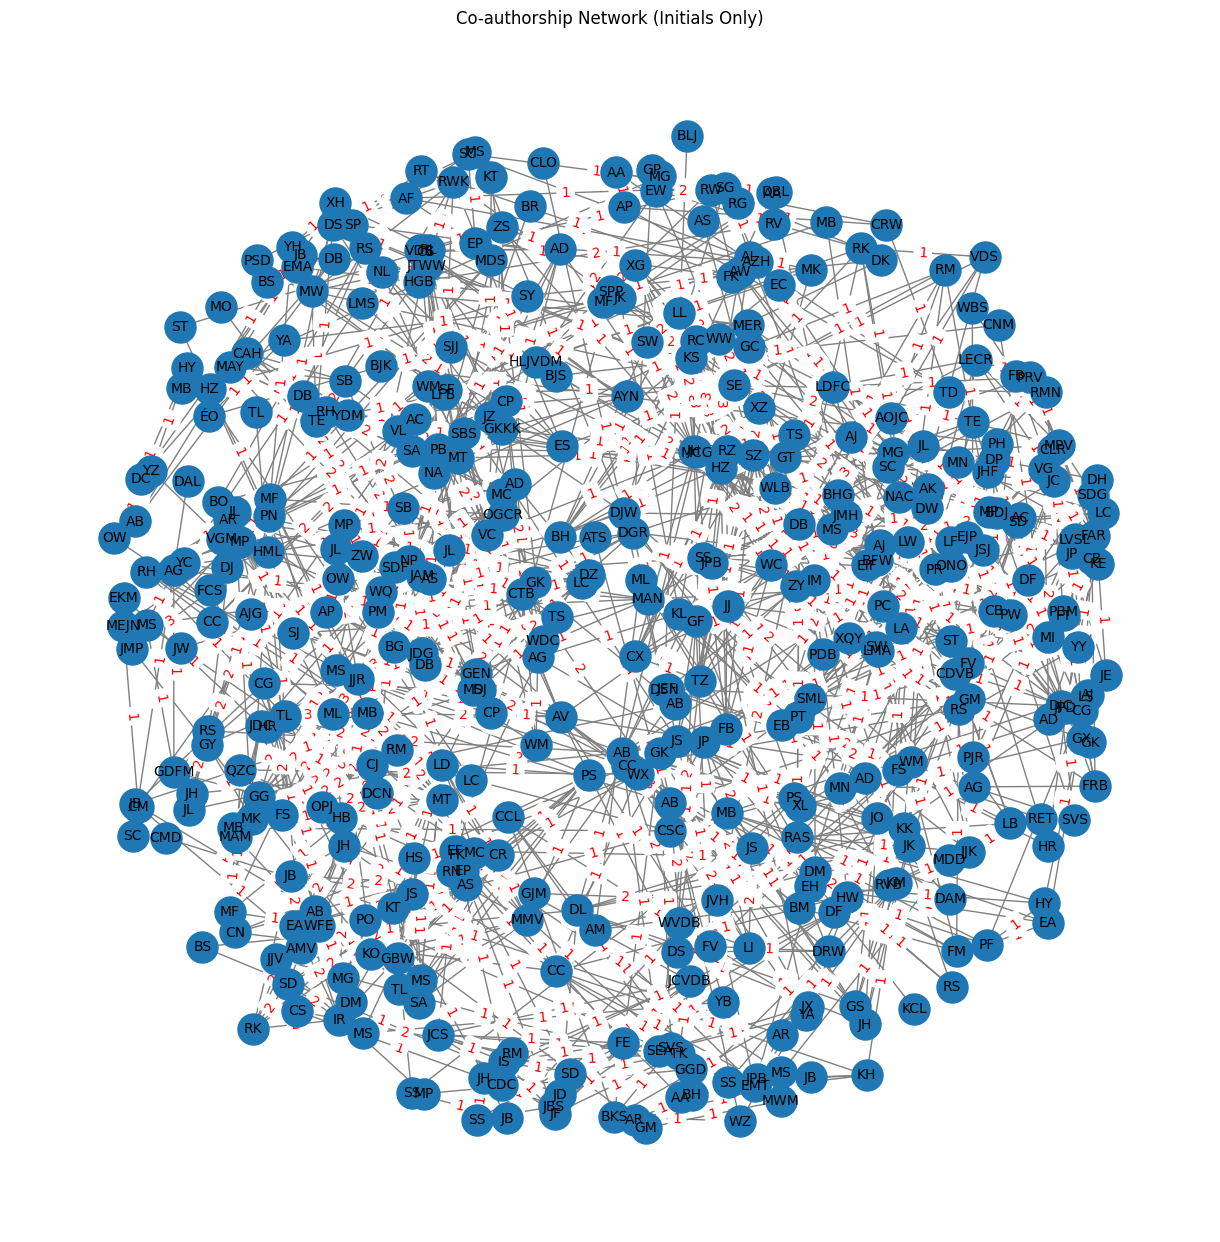

In [24]:
import matplotlib.pyplot as plt

def get_initials(name):
    # Extract the first letter of each word and join them (e.g., "Alex Pentland" -> "AP")
    return ''.join([word[0].upper() for word in name.split() if word])

# Increase the spacing between connected nodes by increasing the k parameter.
# Adjust k as needed based on the density of your graph.
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Create a new labels dictionary with initials instead of full names.
initial_labels = {node: get_initials(node) for node in G.nodes()}

plt.figure(figsize=(12, 12))

# Draw the nodes and edges using the new labels (initials)
nx.draw(G, pos, labels=initial_labels, node_size=500, font_size=10, edge_color='gray')

# Retrieve the edge weights from the graph and draw them.
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Co-authorship Network (Initials Only)")
plt.axis('off')  # Hide axes for clarity
plt.show()


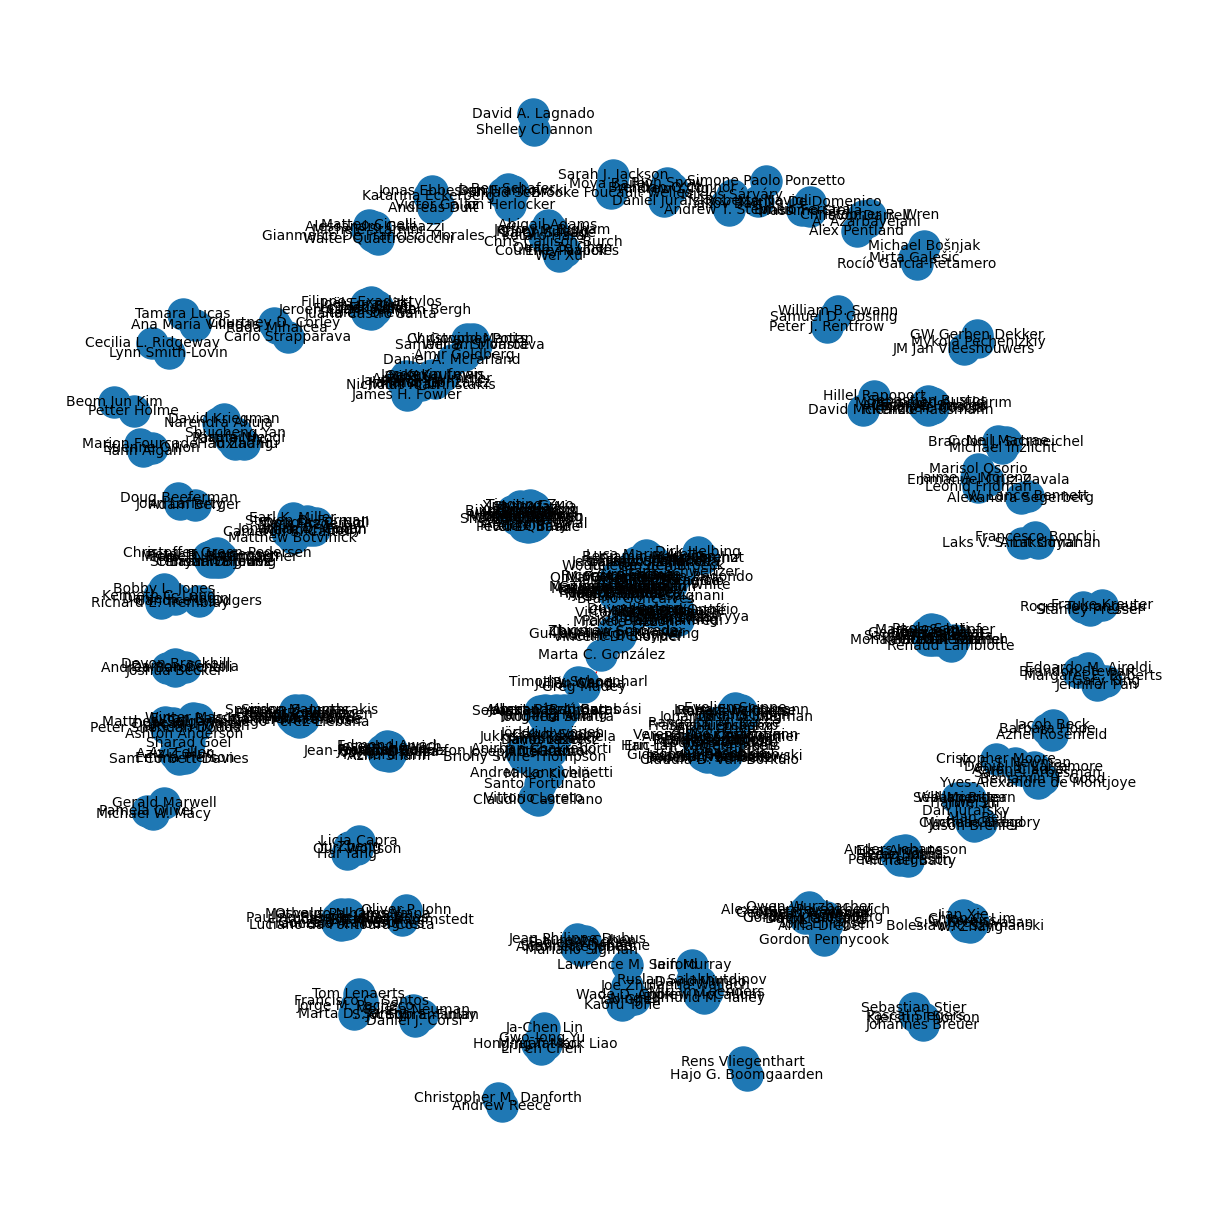

In [25]:
# Assuming G is your NetworkX graph from the previous code snippet

# Generate positions for each node using the spring layout
pos = nx.spring_layout(G)

# Create a new figure with a defined size
plt.figure(figsize=(12, 12))

# Draw the nodes and edges of the graph
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, edge_color='gray')

# Retrieve the edge weights from the graph
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw the edge labels (weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the graph
plt.show()


> 3. **Node Attributes:**
>    - For each node, add attributes for the author's _display name_, _country_, _citation count_, and the _year of their first publication_ in Computational Social Science. The _display name_ and _country_ can be retrieved from your _authors_ dataset. The _year of their first publication_ and the _citation count_  can be retrieved from the _papers_ dataset.
>    - Save the network as a JSON file.
>
> ##### Answer:
>
> Answer cam be seen in the code below with comments.

In [26]:
df_papers = pd.read_csv('IC2S2_papers.csv')

# Convert string representation of the author list into an actual list.
df_papers['author_names'] = df_papers['author_names'].apply(ast.literal_eval)

# Build edge weights from co-authorships.
edge_weights = {}
print("Building collaboration edges...")
for idx, row in df_papers.iterrows():
    authors = row['author_names']
    for pair in combinations(authors, 2):
        key = tuple(sorted(pair))
        edge_weights[key] = edge_weights.get(key, 0) + 1

weighted_edgelist = [(a, b, weight) for (a, b), weight in edge_weights.items()]

# Create the graph from the weighted edge list.
G = nx.Graph()
G.add_weighted_edges_from(weighted_edgelist)

df_authors = pd.read_csv('IC2S2_unique_authors_extended_final.csv')

# Convert the DataFrame into a dictionary keyed by the author name.
authors_dict = df_authors.set_index('author').to_dict('index')

# Add author attributes to the nodes in the graph.
for node in G.nodes():
    if node in authors_dict:
        attr = authors_dict[node]
        G.nodes[node]['display_name'] = attr.get('display_name')
        G.nodes[node]['country_code'] = attr.get('country_code')
        G.nodes[node]['first_pub_year'] = attr.get('first_pub_year')
        G.nodes[node]['citation_count'] = attr.get('citation_count')
    else:
        print(f"Warning: Author '{node}' not found in extended authors CSV.")

# Save the network as a JSON file.
network_json = nx.node_link_data(G)
output_file = 'collaboration_network.json'
with open(output_file, 'w') as f:
    json.dump(network_json, f, indent=2)
print(f"Network saved as '{output_file}'.")

Building collaboration edges...
Network saved as 'collaboration_network.json'.


Visualization of the network:

Loaded graph with 428 nodes and 1129 edges.


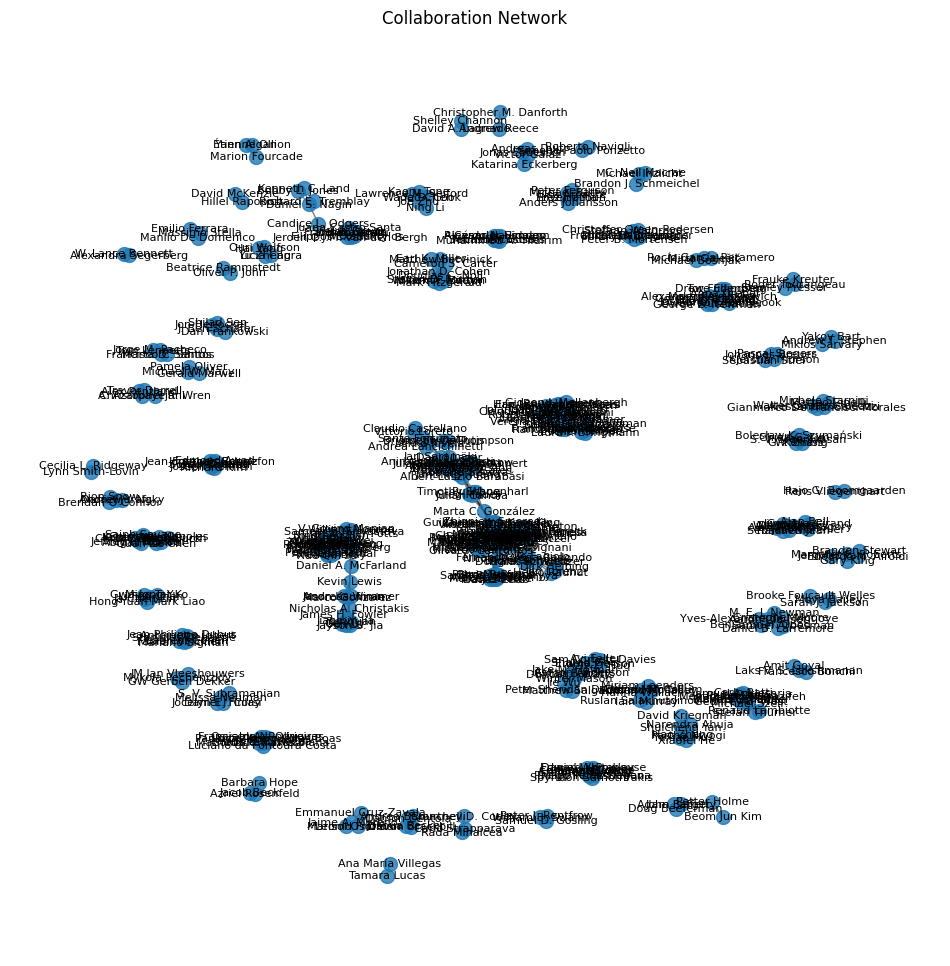

In [27]:
# Load the network JSON file
with open('collaboration_network.json', 'r') as f:
    network_json = json.load(f)

# Convert JSON to a NetworkX graph
G = nx.node_link_graph(network_json)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Compute positions for visualization using a spring layout.
pos = nx.spring_layout(G, seed=42)

# Create a new plot for the network
plt.figure(figsize=(12, 12))
plt.title("Collaboration Network")

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

# Hide the axes
plt.axis('off')
plt.show()


#### Part 2: Preliminary Network Analysis
Now, with the network constructed, perform a basic analysis to explore its features.

>1. Network Metrics:
>What is the total number of nodes (authors) and links (collaborations) in the network?
>Calculate the network's density (the ratio of actual links to the maximum possible number of links). Would you say that the network is sparse? >Justify your answer.
>
> ##### Answer:
>
> (See code below)
>
>A density of 0.0124 is very low, which is typical for collaboration networks. Even though there are 428 authors, there are many possible pairs >>(roughly 91,278 possible pairs), yet only 1129 collaborations are present. This indicates that only a small fraction of the possible collaborations are realized.
>
>The low density suggests that most authors are not directly connected, and only a few pairs have collaborated relative to the maximum number of potential collaborations. This sparsity is common in large networks, especially in fields like academic collaborations, where researchers tend to work with a limited set of peers rather than collaborating with everyone.

In [28]:
# Load the network JSON file
with open('collaboration_network.json', 'r') as f:
    network_json = json.load(f)

# Reconstruct the graph from the JSON data.
G = nx.node_link_graph(network_json)

# Calculate total number of nodes (authors) and edges (collaborations).
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the density of the network.
# For an undirected graph, density = 2*E / (N*(N-1))
density = nx.density(G)

print("Network Metrics:")
print(f"Total number of nodes (authors): {num_nodes}")
print(f"Total number of links (collaborations): {num_edges}")
print(f"Network density: {density:.4f}")



Network Metrics:
Total number of nodes (authors): 428
Total number of links (collaborations): 1129
Network density: 0.0124


>    - Is the network fully connected (i.e., is there a direct or indirect path between every pair of nodes within the network), or is it disconnected?
>
> To answer all these questions we analyzed the graph using the code below this markdown.
>
>##### Answer:
>
>The network is disconnected. While there might be a large giant component connecting many authors, some nodes are isolated or in smaller clusters, so >not every pair of nodes is connected by a path (can also be seen in the illustration).
>
>    - If the network is disconnected, how many connected components does it have? A connected component is defined as a subset of nodes within the network where a path exists between any pair of nodes in that subset. 
>
>##### Answer:
>
>Based on our analysis using NetworkX, the network is divided into 61 connected components. This means that there are 61 distinct subgraphs in which every pair of nodes is connected by some path, while no path exists between nodes in different subgraphs. (måske cap)
>
>    - How many isolated nodes are there in your network?  An isolated node is defined as a node with no connections to any other node in the network.
>
>##### Answer:
>
>Based on the code below we can see that there are no isolated nodes. This can also be seen in the visualization.
>
>    - Discuss the results above on network density, and connectivity. Are your findings in line with what you expected? Why?  __(answer in max 150 words)__
>
>##### Answer:
>
>The network’s density is very low (0.0124), meaning only a tiny fraction of all possible author collaborations occur. In academic settings, researchers tend to work within close-knit groups rather than collaborating widely. Our analysis reveals 61 connected components, indicating that the network is split into several distinct collaborative clusters, though no author is completely isolated. These findings are in line with expectations, as academic collaboration networks typically display sparse overall connectivity with localized, well-connected groups amid many smaller clusters.


In [29]:
#Number of connected components in the network

# Load the network from the JSON file.
with open('collaboration_network.json', 'r') as f:
    data = json.load(f)
G = nx.node_link_graph(data)

# Compute the connected components.
components = list(nx.connected_components(G))
num_components = len(components)

print("Number of connected components:", num_components)


Number of connected components: 61


In [30]:
# Number of isolated nodes

isolated_nodes = list(nx.isolates(G))
print("Number of isolated nodes:", len(isolated_nodes))


Number of isolated nodes: 0


> 3. **Degree Analysis:**
>    - Compute the average, median, mode, minimum, and maximum degree of the nodes. Perform the same analysis for node strength (weighted degree). What do these metrics tell us 
>
> ##### Answer:
>
> Code calculations can be seen below the answer
>
> ##### Degree Metrics:
>The average and median degree indicate the typical number of collaborators per author. A low average compared to the maximum suggests that while most authors have few collaborators, a few have many. The mode shows the most common degree value, and the minimum and maximum reveal the range.
>
>##### Node Strength Metrics:
>Similar to degree, node strength considers the weight of edges (number of collaborations). Higher maximum strength compared to the average indicates that a few authors contribute significantly to the overall collaboration count. Together, these metrics help characterize the network’s connectivity and the distribution of collaborative intensity among authors.

In [31]:
import statistics

# Load the network from the JSON file
with open('collaboration_network.json', 'r') as f:
    data = json.load(f)
G = nx.node_link_graph(data)

# Compute degree metrics (unweighted)
degrees = [deg for node, deg in G.degree()]
avg_degree = sum(degrees) / len(degrees)
median_degree = statistics.median(degrees)
try:
    mode_degree = statistics.mode(degrees)
except statistics.StatisticsError:
    mode_degree = "No unique mode"
min_degree = min(degrees)
max_degree = max(degrees)

# Compute node strength (weighted degree)
weighted_degrees = [deg for node, deg in G.degree(weight='weight')]
avg_strength = sum(weighted_degrees) / len(weighted_degrees)
median_strength = statistics.median(weighted_degrees)
try:
    mode_strength = statistics.mode(weighted_degrees)
except statistics.StatisticsError:
    mode_strength = "No unique mode"
min_strength = min(weighted_degrees)
max_strength = max(weighted_degrees)

print("Degree Analysis:")
print("Average degree:", avg_degree)
print("Median degree:", median_degree)
print("Mode degree:", mode_degree)
print("Minimum degree:", min_degree)
print("Maximum degree:", max_degree)
print("\nNode Strength (Weighted Degree) Analysis:")
print("Average strength:", avg_strength)
print("Median strength:", median_strength)
print("Mode strength:", mode_strength)
print("Minimum strength:", min_strength)
print("Maximum strength:", max_strength)


Degree Analysis:
Average degree: 5.275700934579439
Median degree: 5.0
Mode degree: 2
Minimum degree: 1
Maximum degree: 23

Node Strength (Weighted Degree) Analysis:
Average strength: 6.5327102803738315
Median strength: 5.0
Mode strength: 2
Minimum strength: 1
Maximum strength: 40


> 4. **Top Authors:**
>    - Identify the top 5 authors by degree. What role do these node play in the network? 
>
> ##### Answer
>
> See code for top 5 athors below
>
> The top 5 authors by degree act as hubs within the network. These nodes have numerous direct collaborations, meaning they connect many other authors. Such hub nodes facilitate information flow and resource sharing, bridging gaps between various research clusters. They are likely to be influential, serving as key connectors or gatekeepers within the academic community, and may be instrumental in fostering interdisciplinary collaborations. Their prominence can also indicate higher visibility and reputation in their respective fields.

In [32]:
# Load the network from the JSON file
with open('collaboration_network.json', 'r') as f:
    data = json.load(f)
G = nx.node_link_graph(data)

# Compute the degree for each node (unweighted)
degrees = dict(G.degree())

# Identify the top 5 authors by degree (most collaborations)
top_5 = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 authors by degree:")
for author, degree in top_5:
    print(f"{author}: {degree}")


Top 5 authors by degree:
José J. Ramasco: 23
Denny Borsboom: 22
Rongshou Zheng: 19
Hongmei Zeng: 19
Jie He: 19


>    - Research these authors online. What areas do they specialize in? Do you think that their work aligns with the themes of Computational Social Science? If not, what could be possible reasons? __(answer in max 150 words)__

For José J. Ramasco, he is known in statistical physics and complex systems. His work often involves modeling human dynamics and collective behavior, which can intersect with computational social science.

Denny Borsboom specializes in psychological network analysis and psychometrics, focusing on mental health and the interplay between psychological constructs. His work contributes to computational approaches in psychology, which is a key aspect of computational social science.

Rongshou Zheng works primarily in biomedical research and public health; his focus may be on epidemiological modeling, which, while more health-oriented, can involve computational methods applicable to social science, especially in health behavior.

Hongmei Zeng and Jie He appear to have research in applied mathematics and computational modeling. Their work may not directly align with classical computational social science but can provide methodological insights.

##### THIS IS THE END OF THE ASSIGNment 1

The code below creates the "IC2S2_unique_authors_extended_final.csv" file, that includes :
"author,display_name,country_code,first_pub_year,citation_count".

In [33]:
import pandas as pd
import ast

# Load the CSV file
df = pd.read_csv('IC2S2_papers.csv')

# Extract all authors from each paper
authors_list = []
for _, row in df.iterrows():
    # Convert the string representation to a Python list
    authors = ast.literal_eval(row['author_names'])
    authors_list.extend(authors)

df_all_authors = pd.DataFrame(authors_list, columns=['author'])
df_all_authors.to_csv('IC2S2_all_authors.csv', index=False)

unique_authors = sorted(set(authors_list))
df_unique_authors = pd.DataFrame(unique_authors, columns=['author'])
df_unique_authors.to_csv('IC2S2_unique_authors.csv', index=False)

print("CSV file(s) created successfully.")

CSV file(s) created successfully.


In [ ]:
import pandas as pd
import requests
import time
import urllib.parse

# Read the CSV file with unique authors
df_authors = pd.read_csv('IC2S2_unique_authors.csv')

# Create new columns for display_name and country_code
df_authors['display_name'] = None
df_authors['country_code'] = None

# Loop over each author in the CSV
for idx, row in df_authors.iterrows():
    author_name = row['author']
    print(f"\nProcessing author: {author_name}")
    
    # URL encode the author name to handle spaces and special characters
    encoded_author = urllib.parse.quote(author_name)
    url = f"https://api.openalex.org/authors?search={encoded_author}"
    print(f"Request URL: {url}")
    
    try:
        response = requests.get(url)
        print(f"Response status code: {response.status_code}")
        
        data = response.json()
        meta_info = data.get('meta', {})
        results = data.get('results', [])
        print(f"Meta info: {meta_info}")
        print(f"Number of results found: {len(results)}")
        
        if results:
            # Use the first result
            result = results[0]
            print("First result:")
            print(result)
            
            display_name = result.get('display_name')
            
            # Extract country codes from affiliations.
            affiliations = result.get('affiliations', [])
            country_codes = []
            for aff in affiliations:
                institution = aff.get('institution', {})
                cc = institution.get('country_code')
                if cc and cc not in country_codes:
                    country_codes.append(cc)
            if country_codes:
                country_code_str = ','.join(country_codes)
            else:
                country_code_str = None

            print(f"Extracted display_name: {display_name}")
            print(f"Extracted country_code(s): {country_code_str}")
            
            df_authors.at[idx, 'display_name'] = display_name
            df_authors.at[idx, 'country_code'] = country_code_str
        else:
            print(f"No results found for author: {author_name}")
    except Exception as e:
        print(f"Error processing author {author_name}: {e}")
    
    time.sleep(1)

# Save the extended DataFrame to a new CSV file.
output_filename = 'IC2S2_unique_authors_extended.csv'
df_authors.to_csv(output_filename, index=False)
print(f"\nExtended CSV saved as {output_filename}")


In [ ]:
import pandas as pd
import ast

print("Loading papers dataset from 'IC2S2_papers.csv'...")
df_papers = pd.read_csv('IC2S2_papers.csv')

# Convert the string representation of the author list into an actual list.
df_papers['author_names'] = df_papers['author_names'].apply(ast.literal_eval)

# Dictionaries to store the first publication year and total citation count for each author.
first_pub_year = {}
citation_count = {}

print("Processing papers to compute first publication year and citation count for each author...")
for idx, row in df_papers.iterrows():
    pub_year = row['publication_year']
    cited_by = row['cited_by_count']
    for author in row['author_names']:
        # Update first publication year: take the minimum year encountered.
        if author not in first_pub_year or pub_year < first_pub_year[author]:
            first_pub_year[author] = pub_year
        # Sum citation counts.
        citation_count[author] = citation_count.get(author, 0) + cited_by

print("Computed first publication years:")
print(first_pub_year)
print("Computed citation counts:")
print(citation_count)

print("\nLoading extended authors dataset from 'IC2S2_unique_authors_extended.csv'...")
df_extended = pd.read_csv('IC2S2_unique_authors_extended.csv')

# Add new columns for first publication year and citation count.
df_extended['first_pub_year'] = None
df_extended['citation_count'] = 0

print("Updating extended authors dataset with publication year and citation count...")
for idx, row in df_extended.iterrows():
    author_name = row['author']
    year = first_pub_year.get(author_name)
    citations = citation_count.get(author_name, 0)
    print(f"Author: {author_name} | First Pub Year: {year} | Citation Count: {citations}")
    df_extended.at[idx, 'first_pub_year'] = year
    df_extended.at[idx, 'citation_count'] = citations

output_filename = 'IC2S2_unique_authors_extended_final.csv'
df_extended.to_csv(output_filename, index=False)
print(f"\nExtended CSV saved as '{output_filename}'")
